In [214]:
import pandas as pd
import matplotlib.pyplot as plt

In [215]:
# Assuming 'surveillance_data.xlsx' is your Excel file
xls = pd.ExcelFile('../dat/surveillance_data.xlsx')

# Get the names of all sheets in the Excel file
sheet_names = xls.sheet_names

# Read each sheet into a separate DataFrame and store them in a list
dfs = [pd.read_excel(xls, sheet_name) for sheet_name in sheet_names]

# Add a 'Year' column to each DataFrame
for i in range(len(dfs)):
    dfs[i]['Year'] = sheet_names[i].replace('_surveillance', '')
 
# Concatenate all DataFrames into one
data = pd.concat(dfs, ignore_index=True)

# Convert the 'Year' column to datetime index
data['Year'] = data['Year'].astype(int)
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

1. Trend visualisation:

In [216]:
data

,paragraph,subparagraph,description,description_en,BW,BY,BE,BB,HB,HH,...,NI,NW,RP,SL,SN,ST,SH,TH,GBA,overall
Year,,,,,,,,,,,,,,,,,,,,,
2021-01-01,3,3.1,§ 100a Abs. 1 StPO,§ 100a paragraph 1 StPO,564,1203.0,302,81,24,205,...,584,274,270,44,243,129,294,81,53,5174
2021-01-01,4,4.1,Erstanordnungen,Initial orders,1483,3243.0,1044,163,113,629,...,1249,848,332,62,417,279,776,174,517,13977
2021-01-01,4,4.2,Verlängerungsanordnungen,Extension Orders,346,629.0,253,44,16,141,...,242,192,106,25,67,88,134,68,183,3248
2021-01-01,5,5.1,im richterlichen Beschlussangeordnet,ordered in a court order,2,0.0,4,0,0,5,...,0,20,0,0,0,0,0,1,1,35
2021-01-01,5,5.2,Tatsächlich durchgeführt,Actually done,1,0.0,3,0,0,0,...,0,16,0,0,0,0,0,0,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,6,6.11.b,"Straftaten nach § 52 Abs. 1 Nr. 1, 2 Buchstabe...",NaN,18,8.0,11,0,10,21,...,1,2,10,2,0,1,1,0,0,109
2012-01-01,4,4.1,Erstanordnungen,NaN,2062,6348.0,433,191,264,1418,...,1521,1284,583,54,396,305,305,150,458,17137
2012-01-01,4,4.2,Verlängerungsanordnungen,NaN,57,42.0,13,13,44,19,...,46,65,13,1,3,0,23,1,103,462


In [217]:
#We only analyse pargraph 4 as these are the actual surveillance Orders
data_paragraph4 = data[data['paragraph'].isin([4])]
data_yearly = data_paragraph4.groupby('Year').sum()
data_yearly.drop(['subparagraph', 'description', 'description_en', 'overall','paragraph', 'GBA'], axis=1, inplace=True)
data_yearly['mean'] = data_yearly.mean(axis=1).round().astype(int)

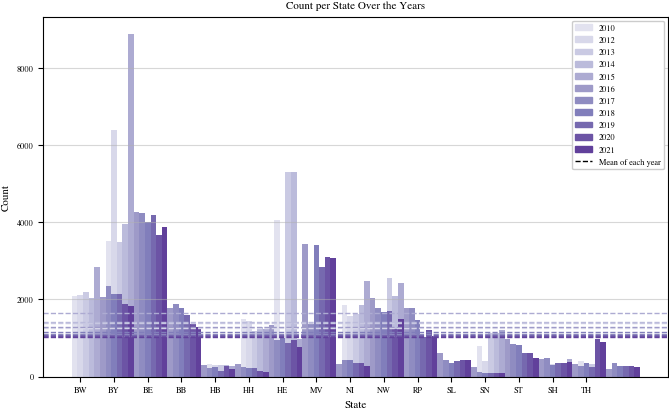

In [218]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from tueplots import bundles
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.rcParams.update(bundles.icml2022(column="full", nrows=1, ncols=1, usetex=False))

# Transpose the DataFrame so that the columns become rows and vice versa
data_yearly_transposed = data_yearly.transpose()
data_yearly_transposed.drop(['mean'], axis=0, inplace=True)

# Create a list of x coordinates for the bars
x = range(len(data_yearly_transposed.index))

# Create a color map
# Create a color map
colors = cm.Purples(np.linspace(0.2, 0.8, len(data_yearly_transposed.columns)))
fig, ax = plt.subplots(1,1)

# Create a list to store the patches for the legend
legend_patches = []

# Create a bar plot for each column
for i, (year, color) in enumerate(zip(data_yearly_transposed.columns, colors)):
    ax.bar([xi*1.2 + i*0.2 for xi in x], data_yearly_transposed[year], width=0.2, label=year.year, color=color)
    
    # Calculate the mean for the year
    mean = data_yearly_transposed[year].mean()

    # Draw a horizontal line at the mean value
    ax.axhline(mean, color=color, linestyle='dashed', linewidth=1)

    # Create a patch for the legend
    legend_patches.append(Patch(color=color, label=year.year))

# Add a line to the legend for the mean
legend_patches.append(Line2D([0], [0], color='black', lw=1, linestyle='--', label='Mean of each year'))

# Set the labels of the x-axis, y-axis and title
ax.set_xlabel('State')
ax.set_ylabel('Count')
ax.set_title('Count per State Over the Years')

# Set the x-ticks to be the states and rotate them
plt.xticks([xi*1.2 + 0.2 for xi in x], data_yearly_transposed.index, rotation=0)
ax.grid(which="major", axis="y", alpha=0.5)

# Display the legend
ax.legend(handles=legend_patches, loc="upper right", framealpha=1, facecolor="white")

plt.show()

In [219]:
#data_yearly_transposed.columns = ['state', 2013,  2016,  2019,  2020, 2021]
print(data_yearly)
print(data_yearly.index)

              BW      BY    BE   BB   HB    HH    HE   MV    NI    NW   RP  \
Year                                                                         
2010-01-01  2085  3529.0  1338  410  324  1490  4071  449  1861  1601  570   
2012-01-01  2119  6390.0   446  204  308  1437   730  654  1567  1349  596   
2013-01-01  2193  3485.0  2046  289  311  1175  5308  652  1631  2545  606   
2014-01-01  2044  3967.0  1974  489  310  1299  5318  393  1855  2084  754   
2015-01-01  2850  8892.0  2974  279  278  1229   978  708  2476  2428  734   
2016-01-01  2076  4258.0  1779  288  320  1328  3451  319  2032  1779  621   
2017-01-01  2344  4238.0  1893  226  237   937  1370  443  1775  1773  425   
2018-01-01  2151  4013.0  1787  261  227   992  3409  432  1678  1471  353   
2019-01-01  2154  4183.0  1592  136  226   872  2833  348  1690  1015  398   
2020-01-01  1870  3676.0  1358  267  143   949  3107  353  1233  1214  430   
2021-01-01  1829  3872.0  1297  207  129   770  3079  283  1491 

In [220]:
population = pd.read_csv('../dat/12411-0010-DLAND_population.csv')
population = pd.melt(population, id_vars=['state'], value_vars=population.columns[1:])
population.columns = ['state', 'year', 'population']
population['year'] = population.year.astype('int64')
print(population)
population.index

    state  year  population
0      BW  2013    10631278
1      BY  2013    12604244
2      BE  2013     3421829
3      BB  2013     2449193
4      HB  2013      657391
..    ...   ...         ...
155    SL  2022      992666
156    SN  2022     4086152
157    ST  2022     2186643
158    SH  2022     2953270
159    TH  2022     2126846

[160 rows x 3 columns]


RangeIndex(start=0, stop=160, step=1)

In [221]:
# Reshape data_yearly from wide format to long format
data_yearly_melted = data_yearly.reset_index().melt(id_vars='Year', var_name='state', value_name='count')

# Convert the 'Year' column to datetime and then to int64 to match population
data_yearly_melted['year'] = pd.to_datetime(data_yearly_melted['Year']).dt.year

# Merge data_yearly_melted and population
merged_df = pd.merge(data_yearly_melted, population, how='inner', on=['state', 'year'])

merged_df

,Year,state,count,year,population
0,2013-01-01,BW,2193.0,2013,10631278
1,2014-01-01,BW,2044.0,2014,10716644
2,2015-01-01,BW,2850.0,2015,10879618
3,2016-01-01,BW,2076.0,2016,10951893
4,2017-01-01,BW,2344.0,2017,11023425
...,...,...,...,...,...
139,2017-01-01,TH,360.0,2017,2151205
140,2018-01-01,TH,279.0,2018,2143145
141,2019-01-01,TH,282.0,2019,2133378
142,2020-01-01,TH,271.0,2020,2120237


In [222]:
# Group the data by year and calculate the sum of counts and population
ger_data = merged_df.groupby('year').agg({'count': 'sum', 'population': 'sum'}).reset_index()

# Add a new column 'state' with the value 'GER'
ger_data['state'] = 'GER'

# Append ger_data to merged_df
merged_df = pd.concat([merged_df, ger_data], ignore_index=True)

merged_df

,Year,state,count,year,population
0,2013-01-01,BW,2193.0,2013,10631278
1,2014-01-01,BW,2044.0,2014,10716644
2,2015-01-01,BW,2850.0,2015,10879618
3,2016-01-01,BW,2076.0,2016,10951893
4,2017-01-01,BW,2344.0,2017,11023425
...,...,...,...,...,...
148,NaT,GER,17755.0,2017,82792351
149,NaT,GER,18636.0,2018,83019213
150,NaT,GER,17066.0,2019,83166711
151,NaT,GER,16894.0,2020,83155031


In [223]:
#divide count by population
merged_df['count_norm'] = (merged_df['count'] / merged_df['population'] * 100_000).round(5)
merged_df

,Year,state,count,year,population,count_norm
0,2013-01-01,BW,2193.0,2013,10631278,20.62781
1,2014-01-01,BW,2044.0,2014,10716644,19.07314
2,2015-01-01,BW,2850.0,2015,10879618,26.19577
3,2016-01-01,BW,2076.0,2016,10951893,18.95563
4,2017-01-01,BW,2344.0,2017,11023425,21.26381
...,...,...,...,...,...,...
148,NaT,GER,17755.0,2017,82792351,21.44522
149,NaT,GER,18636.0,2018,83019213,22.44782
150,NaT,GER,17066.0,2019,83166711,20.52023
151,NaT,GER,16894.0,2020,83155031,20.31627


In [224]:
#transfrom to wide format
merged_df_wide = merged_df.pivot(index='state', columns='year', values='count_norm')
merged_df_wide.columns

Index([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='int32', name='year')

In [225]:
german_mean = merged_df_wide.loc['GER']
data_yearly_transposed = merged_df_wide.drop('GER')

2013
2014
2015
2016
2017
2018
2019
2020
2021


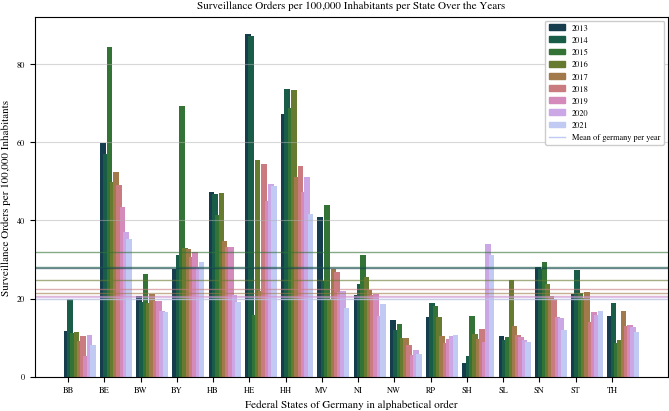

In [226]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from tueplots import bundles
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.rcParams.update(bundles.icml2022(column="full", nrows=1, ncols=1, usetex=False))


# Create a list of x coordinates for the bars
x = range(len(data_yearly_transposed.index))
bar_width = 0.1

# Create a color map
colors = cm.cubehelix(np.linspace(0.2, 0.8, len(data_yearly_transposed.columns)))
fig, ax = plt.subplots(1,1)

# Create a list to store the patches for the legend
legend_patches = []

# Create a bar plot for each column
for i, (year, color) in enumerate(zip(data_yearly_transposed.columns, colors)):
    ax.bar([xi*(1+bar_width) + i*bar_width for xi in x], data_yearly_transposed[year], width=0.17, label=year, color=color)
    
    # Draw a horizontal line at the mean value
    print(year)
    ax.axhline(german_mean[year], color=color, linestyle='solid',alpha=0.6, linewidth=1,)

    # Create a patch for the legend
    legend_patches.append(Patch(color=color, label=year))

# Add a line to the legend for the mean
legend_patches.append(Line2D([0], [0], color=color, lw=1, linestyle='-', label='Mean of germany per year'))

# Set the labels of the x-axis, y-axis and title
ax.set_xlabel('Federal States of Germany in alphabetical order')
ax.set_ylabel('Surveillance Orders per 100,000 Inhabitants')
ax.set_title('Surveillance Orders per 100,000 Inhabitants per State Over the Years')

# Set the x-ticks to be the states and rotate them
plt.xticks([xi*(1+bar_width) + 0.5*bar_width for xi in x], data_yearly_transposed.index, rotation=0)
ax.grid(which="major", axis="y", alpha=0.5)

# Display the legend
ax.legend(handles=legend_patches, loc="upper right", framealpha=1, facecolor="white")
plt.savefig('../doc/fig/trend.pdf')
plt.show()

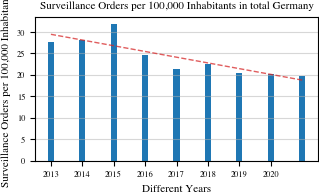

In [232]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from tueplots import bundles
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))


fig, ax = plt.subplots(1,1)
ax.bar(german_mean.index, german_mean, width=0.2, label='GER')

# Fit a polynomial of degree 1 to the data
z = np.polyfit(german_mean.index, german_mean, 1)

# Create a polynomial function from the coefficients
p = np.poly1d(z)

# Generate x values
x = np.linspace(german_mean.index.min(), german_mean.index.max(), 100)

# Plot the interpolated line
ax.plot(x, p(x), '--', color='tab:red', label='Interpolated line', linewidth=1, alpha=0.75)

# Set the labels of the x-axis, y-axis and title
ax.set_xlabel('Different Years')
ax.set_ylabel('Surveillance Orders per 100,000 Inhabitants')
ax.set_title('Surveillance Orders per 100,000 Inhabitants in total Germany')

# Set the x-ticks to be the states and rotate them
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
plt.xticks(years, years, rotation=0)
ax.grid(which="major", axis="y", alpha=0.5)

# Display the legend
#ax.legend(handles=legend_patches, loc="upper right", framealpha=1, facecolor="white")
plt.savefig('../doc/fig/trend_ger.pdf')
plt.show()

In [233]:
data_yearly_transposed

year,2013,2014,2015,2016,2017,2018,2019,2020,2021
state,,,,,,,,,
BB,11.79981,19.89526,11.22815,11.54471,9.02541,10.39047,5.39277,10.54889,8.15645
BE,59.79258,56.89008,84.48789,49.76460,52.38696,49.02840,43.38476,37.06243,35.26879
BW,20.62781,19.07314,26.19577,18.95563,21.26381,19.43171,19.40472,16.84223,16.44098
BY,27.64942,31.25697,69.23339,32.92926,32.60701,30.68812,31.87111,27.97526,29.38456
HB,47.30822,46.83572,41.40053,47.14528,34.80013,33.23641,33.17665,21.02539,19.06978
HE,87.80193,87.26777,15.83505,55.54404,21.94366,54.40638,45.05350,49.37111,48.91170
HH,67.28350,73.68996,68.75878,73.35242,51.18585,53.87852,47.20523,51.22868,41.53328
MV,40.83921,24.57574,43.91073,19.80537,27.49642,26.83772,21.63993,21.91493,17.56498
NI,20.93560,23.70080,31.23660,25.57363,22.29122,21.02112,21.14189,15.40591,18.57474


Internet Users are going up, while the telecommunication is decreasing....


In [234]:
# Assuming 'data' is your DataFrame
correlation = data_yearly.iloc[:, 1:-2].corr()
correlation

,BY,BE,BB,HB,HH,HE,MV,NI,NW,RP,SL,SN,ST,SH
BY,1.000000,0.351233,-0.168438,0.202372,0.266128,-0.703729,0.665321,0.645881,0.319069,0.468484,-0.178823,0.189373,-0.073469,-0.031354
BE,0.351233,1.000000,0.238026,0.147181,-0.083027,0.107333,0.248572,0.710788,0.710482,0.361877,0.252018,0.867409,0.469470,-0.244473
BB,-0.168438,0.238026,1.000000,0.493524,0.587519,0.605456,0.013922,0.271884,0.498110,0.626865,0.121847,0.561045,0.804231,-0.264077
HB,0.202372,0.147181,0.493524,1.000000,0.875828,0.178213,0.503051,0.563753,0.625351,0.695197,0.304960,0.526291,0.556870,-0.827531
HH,0.266128,-0.083027,0.587519,0.875828,1.000000,0.085987,0.472537,0.427134,0.450016,0.730328,0.188727,0.299849,0.463261,-0.479706
HE,-0.703729,0.107333,0.605456,0.178213,0.085987,1.000000,-0.314077,-0.196648,0.236780,0.146687,0.163782,0.377701,0.458098,-0.226009
MV,0.665321,0.248572,0.013922,0.503051,0.472537,-0.314077,1.000000,0.389414,0.636925,0.485997,-0.354951,0.343532,0.075340,-0.393477
NI,0.645881,0.710788,0.271884,0.563753,0.427134,-0.196648,0.389414,1.000000,0.616693,0.622922,0.384247,0.685890,0.514294,-0.439967
NW,0.319069,0.710482,0.498110,0.625351,0.450016,0.236780,0.636925,0.616693,1.000000,0.718359,0.172290,0.912169,0.632141,-0.550261
RP,0.468484,0.361877,0.626865,0.695197,0.730328,0.146687,0.485997,0.622922,0.718359,1.000000,0.106960,0.619902,0.653016,-0.387803


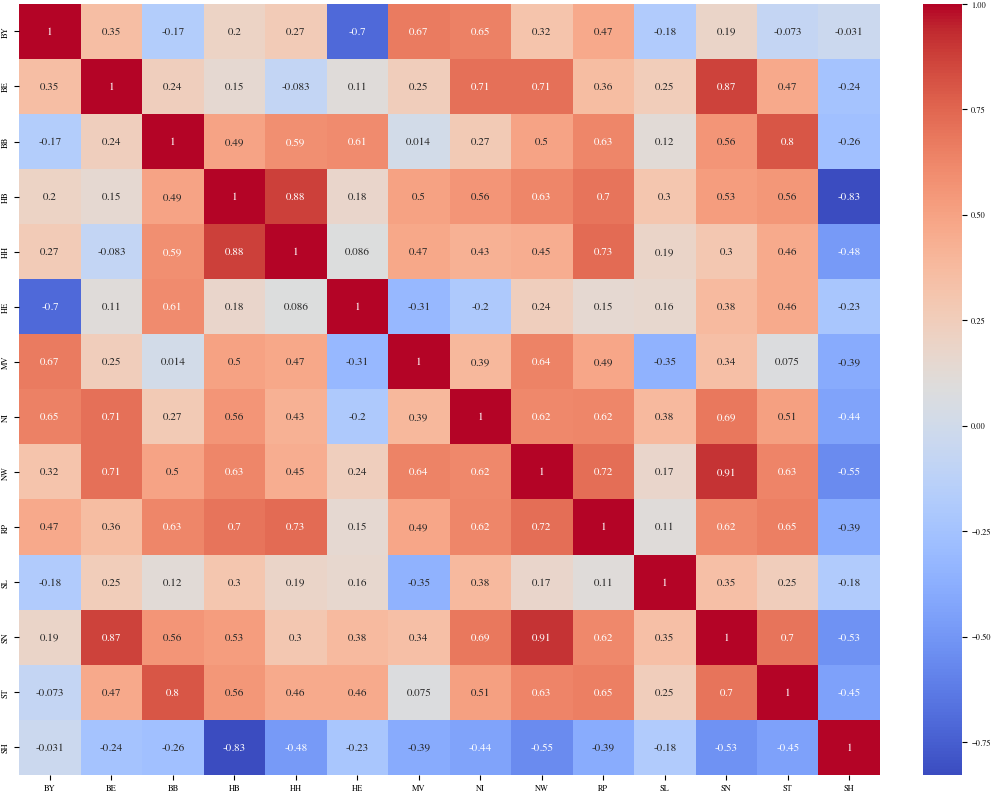

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

/Users/Jakob/Code_Uni/DataLiteracy/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.draw()
/Users/Jakob/Code_Uni/DataLiteracy/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.draw()
/Users/Jakob/Code_Uni/DataLiteracy/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.draw()


RuntimeError: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.

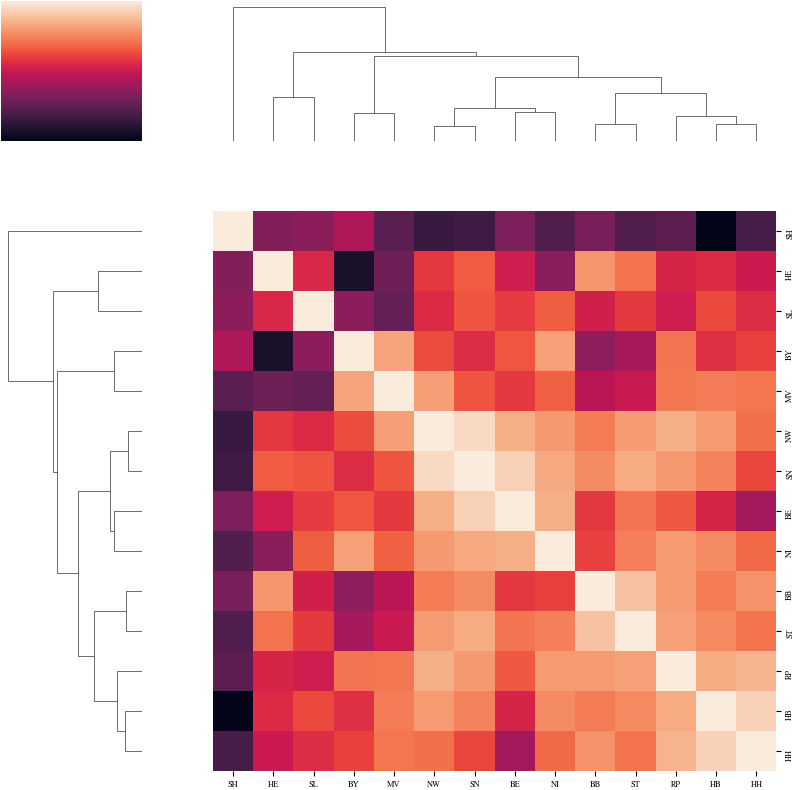

In [236]:
import seaborn as sns
from scipy.cluster import hierarchy

# Assuming 'correlation' is your correlation matrix
# Generate the linkage matrix for the clusters
linkage = hierarchy.ward(correlation)

# Create a clustermap
sns.clustermap(correlation, method='ward', col_linkage=linkage, row_linkage=linkage)

plt.show()